# Analyze, identify patterns, and explore the data.

Analyzing data is important because it provides valuable insights and information that can drive decision-making and problem-solving. By analyzing data, patterns, trends, and correlations can be identified, enabling organizations to make informed decisions and predictions. Data analysis helps businesses understand their customers, optimize processes, identify opportunities, detect anomalies, and measure performance. It also supports evidence-based research and helps uncover relationships and causality between variables. Overall, data analysis empowers organizations to gain a competitive edge, improve efficiency, and make data-driven decisions.

## Libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [2]:
data = pd.read_csv('../data/cleaned_data.csv')

---

# Project Target (Time_taken(min))
The time taken by the delivery partner to complete the order

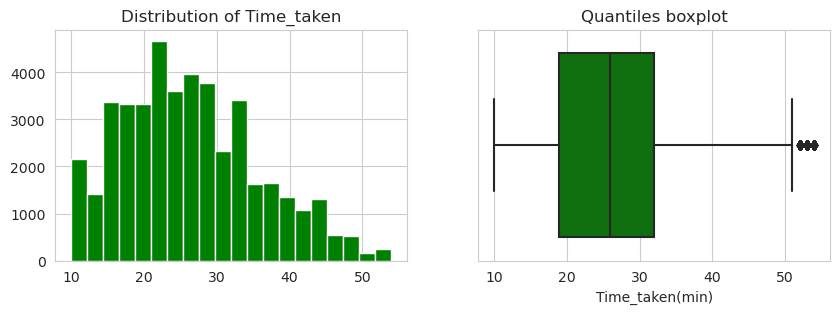

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.distplot(x = data['Time_taken(min)'], bins = 20,
             kde = False, hist_kws = {'alpha': 1}, color = 'green', ax = ax1)
ax1.set_title('Distribution of Time_taken')

sns.boxplot(data = data, x = 'Time_taken(min)', ax = ax2, color = 'green')
ax2.set_title('Quantiles boxplot');

In [4]:
data['Time_taken(min)'].describe().to_frame()[1:]

,Time_taken(min)
mean,26.293831
std,9.373765
min,10.000000
25%,19.000000
50%,26.000000
75%,32.000000
max,54.000000


In [13]:
# Quantile 0.99, outliers count
data['Time_taken(min)'].quantile(0.99), data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)].count()[0]

(49.0, 412)

In [9]:
data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)][['Weatherconditions', 'Road_traffic_density', 'Time_taken(min)']].mode()

,Weatherconditions,Road_traffic_density,Time_taken(min)
0,Fog,Jam,53.0


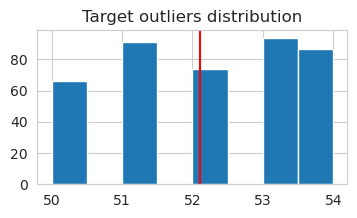

In [53]:
plt.figure(figsize = (4, 2))

sns.distplot(x = data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)]['Time_taken(min)'], hist_kws = {'alpha': 1}, kde = False)
plt.axvline(data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)]['Time_taken(min)'].mean(), color = 'red')
plt.title('Target outliers distribution');

In [39]:
# Quantile 0.15, fastest deliveries count
data['Time_taken(min)'].quantile(0.15), data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.15)].count()[0]

(16.0, 36920)

In [41]:
# Percentage of deliveries below 16 minutes
data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.15)].count()[0] / data.shape[0] * 100

84.17308832246592

In [42]:
data['Time_taken(min)'].min(), data['Time_taken(min)'].max() 

(10.0, 54.0)

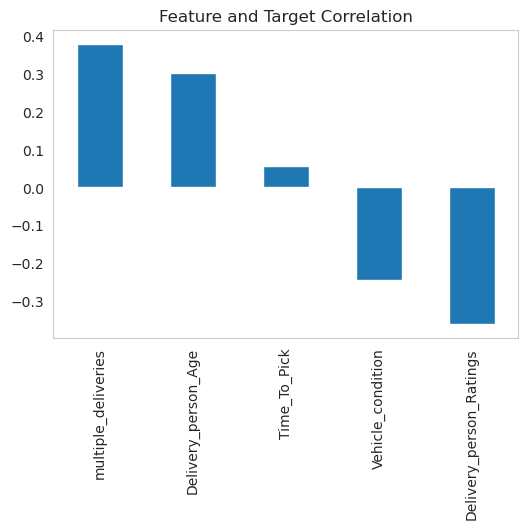

In [8]:
data.drop(['Order_Year', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude'], axis = 1).corr()['Time_taken(min)'].sort_values(ascending = False)[1:].plot(kind = 'bar',
                                                                       title = 'Feature and Target Correlation',
                                                                                                   figsize = (6, 4))

plt.grid(False);

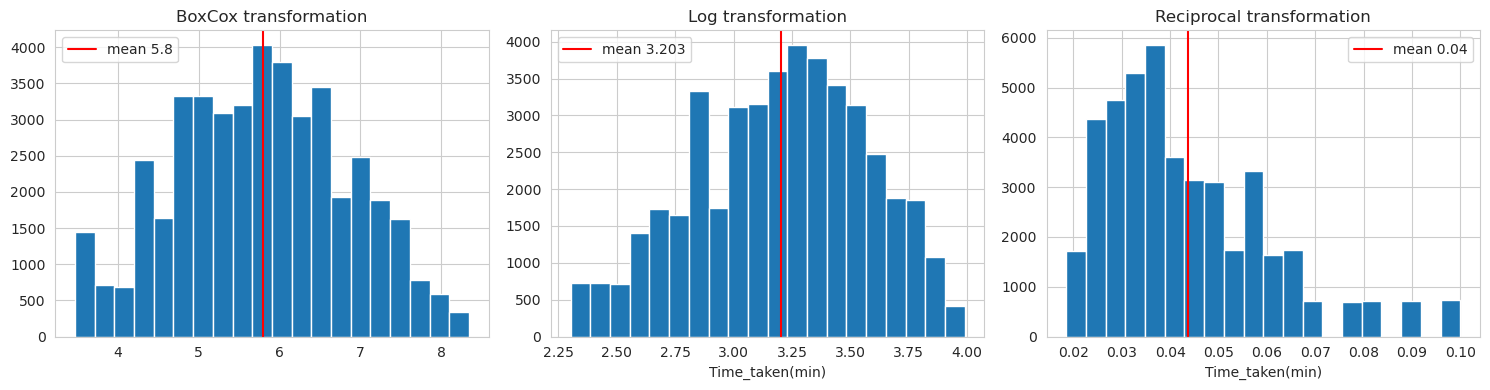

In [69]:
import scipy.stats as stats

TargetBoxCox, param = stats.boxcox(data['Time_taken(min)'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 4))

sns.distplot(TargetBoxCox, bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax1)
ax1.axvline(TargetBoxCox.mean(), color = 'red', label = f'mean {round(TargetBoxCox.mean(), 2)}')
ax1.set_title('BoxCox transformation')
ax1.legend(loc = 'upper left')

sns.distplot(np.log(data['Time_taken(min)']), bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax2)
ax2.axvline(np.log(data['Time_taken(min)']).mean(), color = 'red', label = f"mean {round(np.log(data['Time_taken(min)']).mean(), 3)}")
ax2.set_title('Log transformation')
ax2.legend(loc = 'upper left')

sns.distplot(1 / (data['Time_taken(min)']), bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax3)
ax3.axvline((1 / (data['Time_taken(min)'])).mean(), color = 'red', label = f"mean {round((1 / (data['Time_taken(min)'])).mean(), 2)}")
ax3.set_title('Reciprocal transformation')
ax3.legend()

plt.tight_layout();

**Importan finds:**
-  Target is a little right skewed
-  Skewness is cause due to outliers that are above the 0.99 quantile, meaning, 49 or more minutes do deliver the order.
-  Average weather conditions of those outliers was Fog,  traffic density Jam and the deliver time about 53 minutes.
-  More than 80% of the deliveries were made in 16 minutes or less.
-  Fastest delivery was 10 minutes and the slowest 54 minutes
-  The amount of deliveries and the ratings of the person delivering are key factors to the delivery time.

**Notes:**
- I might need to perform some transformation in order to normalise the target
- BoxCox transformation is the one that fits a better normal distribution.


# Descrete & Continuous Features

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43862 entries, 0 to 43861
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43862 non-null  object 
 1   Delivery_person_ID           43862 non-null  object 
 2   Delivery_person_Age          43862 non-null  float64
 3   Delivery_person_Ratings      43862 non-null  float64
 4   Restaurant_latitude          43862 non-null  float64
 5   Restaurant_longitude         43862 non-null  float64
 6   Delivery_location_latitude   43862 non-null  float64
 7   Delivery_location_longitude  43862 non-null  float64
 8   Order_Date                   43862 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            43862 non-null  object 
 11  Weatherconditions            43862 non-null  object 
 12  Road_traffic_density         43862 non-null  object 
 13  Vehicle_conditio

In [71]:
NumericalDatadata.select_dtypes(exclude = 'O')

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min),Time_To_Pick,Order_Year
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,0.0,24.0,15.0,2022.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2.0,1.0,33.0,5.0,2022.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0.0,1.0,26.0,15.0,2022.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0.0,1.0,21.0,10.0,2022.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1.0,1.0,30.0,15.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...
43857,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1.0,0.0,32.0,10.0,2022.0
43858,21.0,4.6,0.000000,0.000000,0.070000,0.070000,0.0,1.0,36.0,15.0,2022.0
43859,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1.0,0.0,16.0,-1425.0,2022.0
43860,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0.0,1.0,26.0,5.0,2022.0
